In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('EmployeesAttrition.csv')

# Displaying the first few rows of the dataset
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
# Checking the shape of the dataset
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (59598, 24)


In [5]:
#coloumns of the dataset
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [6]:
#information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing Values: \n{missing_values}")

Missing Values: 
Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


In [18]:
# Check for duplicate rows in the dataset
print("Number of duplicate rows in the dataset:")
duplicates = data.duplicated().sum()
print(duplicates)

Number of duplicate rows in the dataset:
0


In [9]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 
                    'Performance Rating', 'Remote Work', 'Leadership Opportunities', 
                    'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 
                    'Attrition', 'Overtime', 'Education Level', 'Marital Status', 
                    'Job Level', 'Company Size']

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()

# Ensure all categories are encoded starting from 0
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Verify that the columns are now numerical and start from 0
print(data[categorical_cols].head())

   Gender  Job Role  Work-Life Balance  Job Satisfaction  Performance Rating  \
0       1         0                  0                 2                   0   
1       0         3                  3                 0                   3   
2       0         2                  2                 0                   3   
3       0         0                  2                 0                   2   
4       1         0                  1                 3                   0   

   Remote Work  Leadership Opportunities  Innovation Opportunities  \
0            0                         0                         0   
1            0                         0                         0   
2            0                         0                         0   
3            1                         0                         0   
4            0                         0                         0   

   Company Reputation  Employee Recognition  Attrition  Overtime  \
0                   0         

In [10]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns
numerical_cols = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 'Number of Dependents']

# Scale numerical columns to a range of 0 to 1
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verify the scaling of the numerical columns
print(data[numerical_cols].describe())

                Age  Monthly Income  Years at Company  Number of Promotions  \
count  59598.000000    59598.000000      59598.000000          59598.000000   
mean       0.501607        0.403586          0.295078              0.208145   
std        0.294626        0.145045          0.224920              0.248748   
min        0.000000        0.000000          0.000000              0.000000   
25%        0.243902        0.292726          0.120000              0.000000   
50%        0.512195        0.407065          0.240000              0.250000   
75%        0.756098        0.509944          0.440000              0.500000   
max        1.000000        1.000000          1.000000              1.000000   

       Number of Dependents  
count          59598.000000  
mean               0.274679  
std                0.259281  
min                0.000000  
25%                0.000000  
50%                0.166667  
75%                0.500000  
max                1.000000  


# EDA

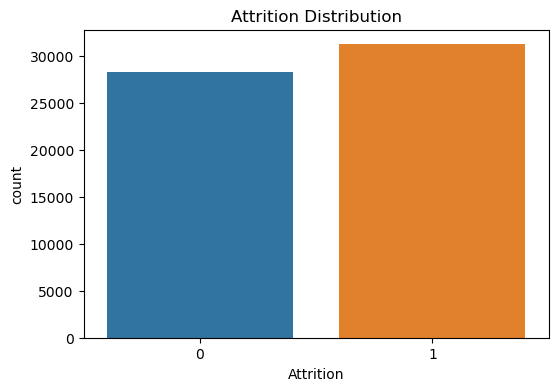

In [11]:
# Plot distribution of Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

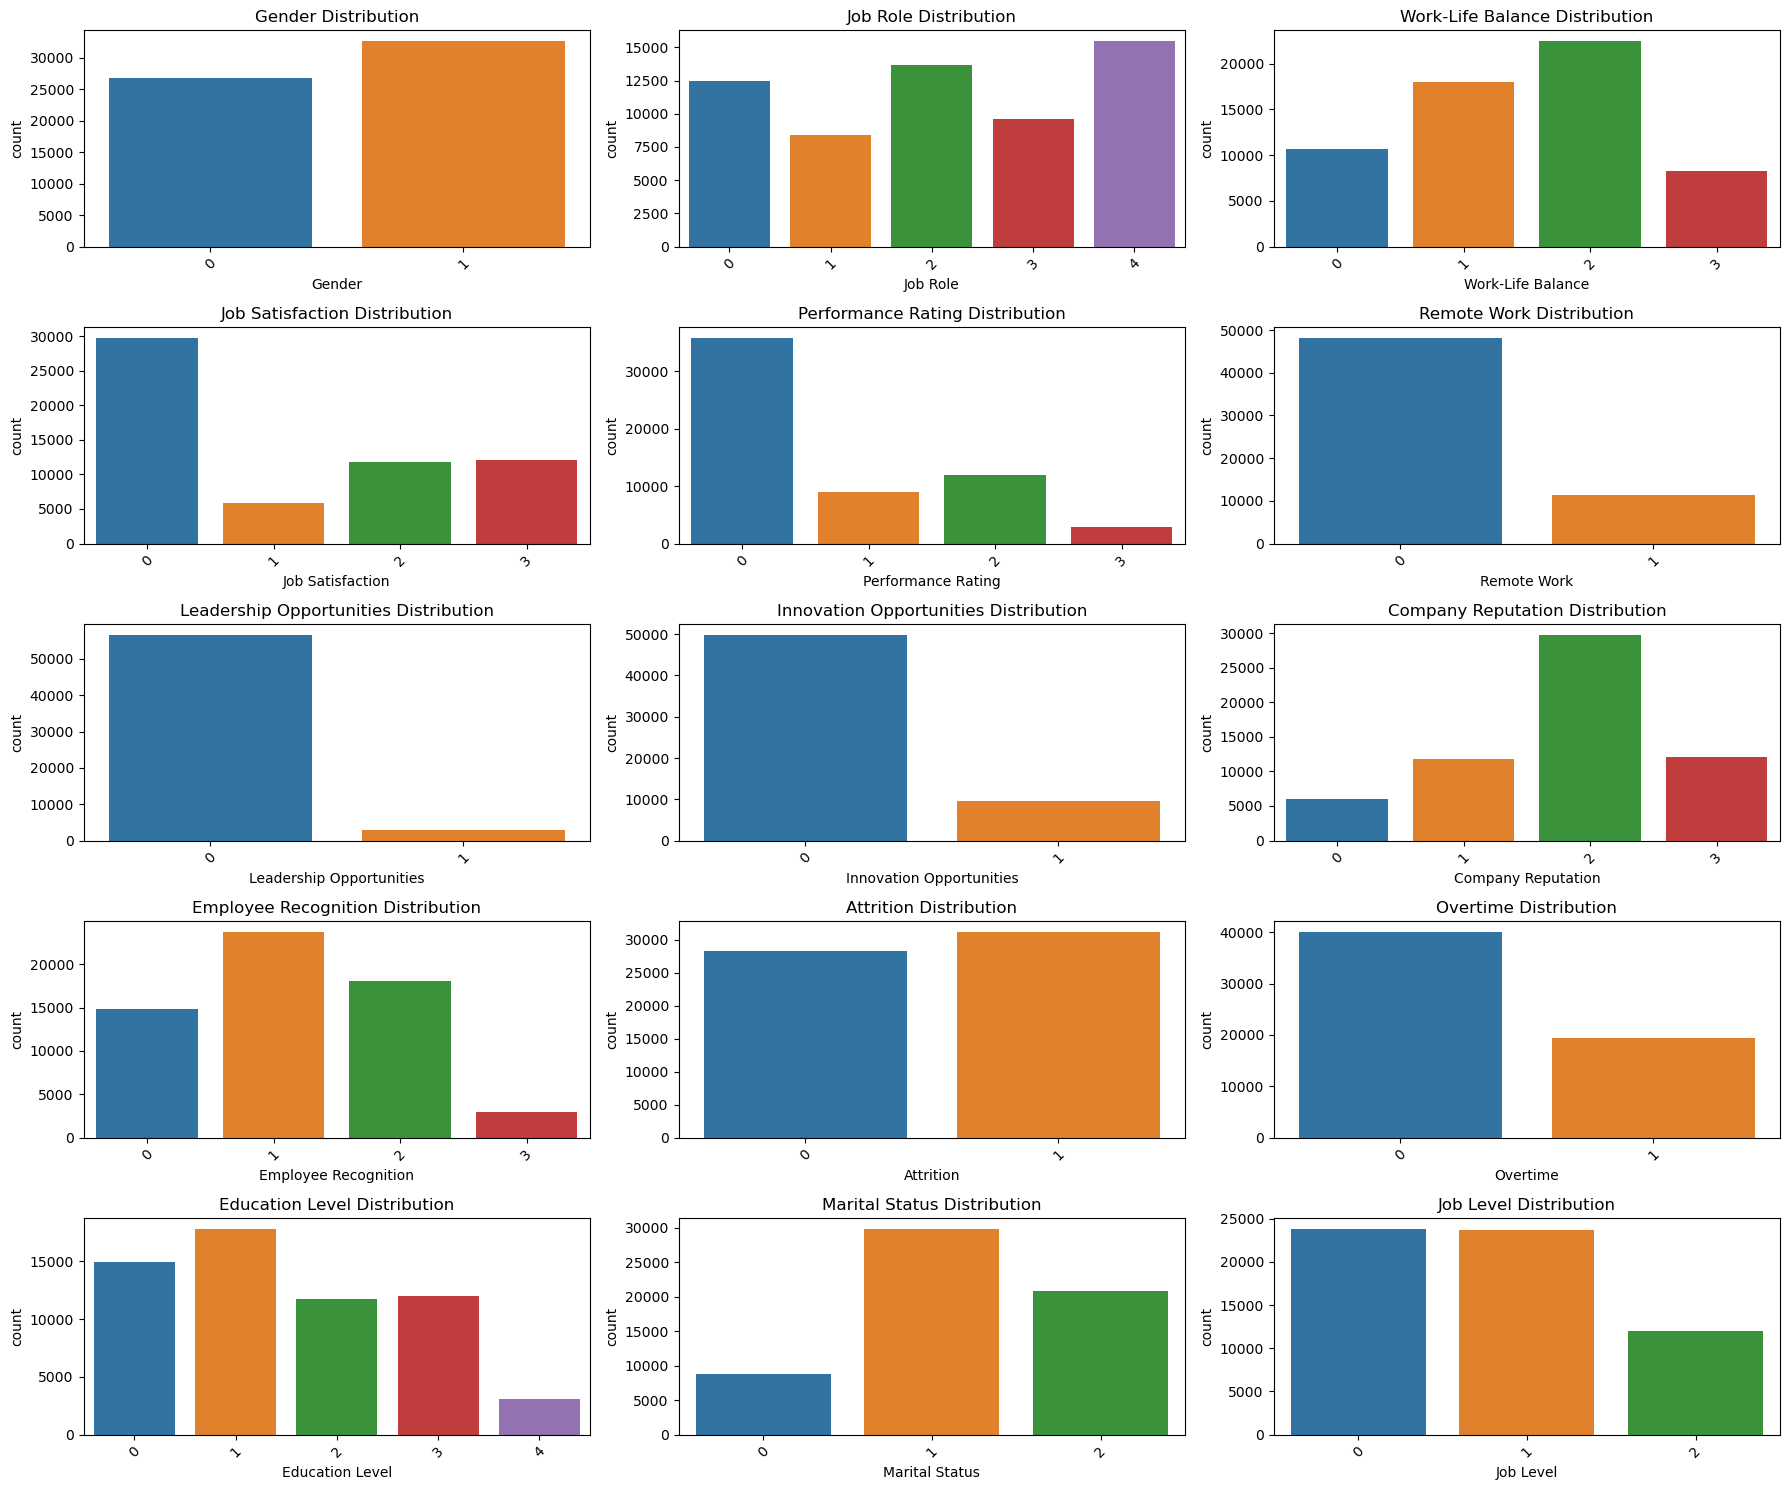

In [12]:
# Plot categorical variables
plt.figure(figsize=(18,15))
for i, col in enumerate(categorical_cols[:-1], 1):  # Exclude 'Attrition' column
    plt.subplot(5, 3, i)
    sns.countplot(x=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

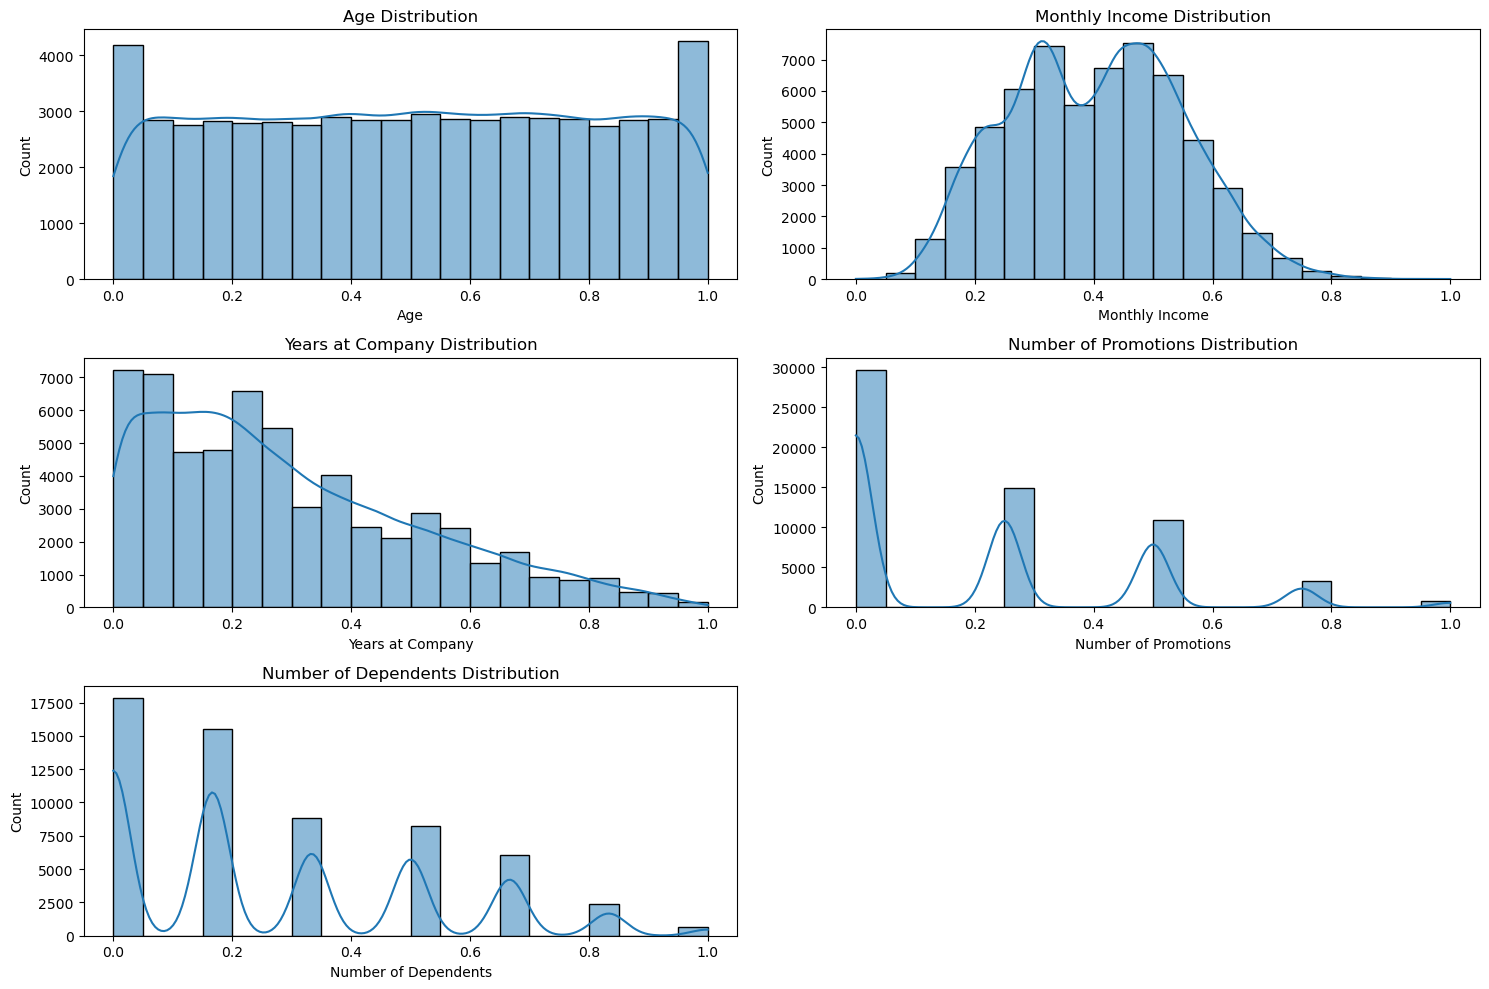

In [13]:
# Plot histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

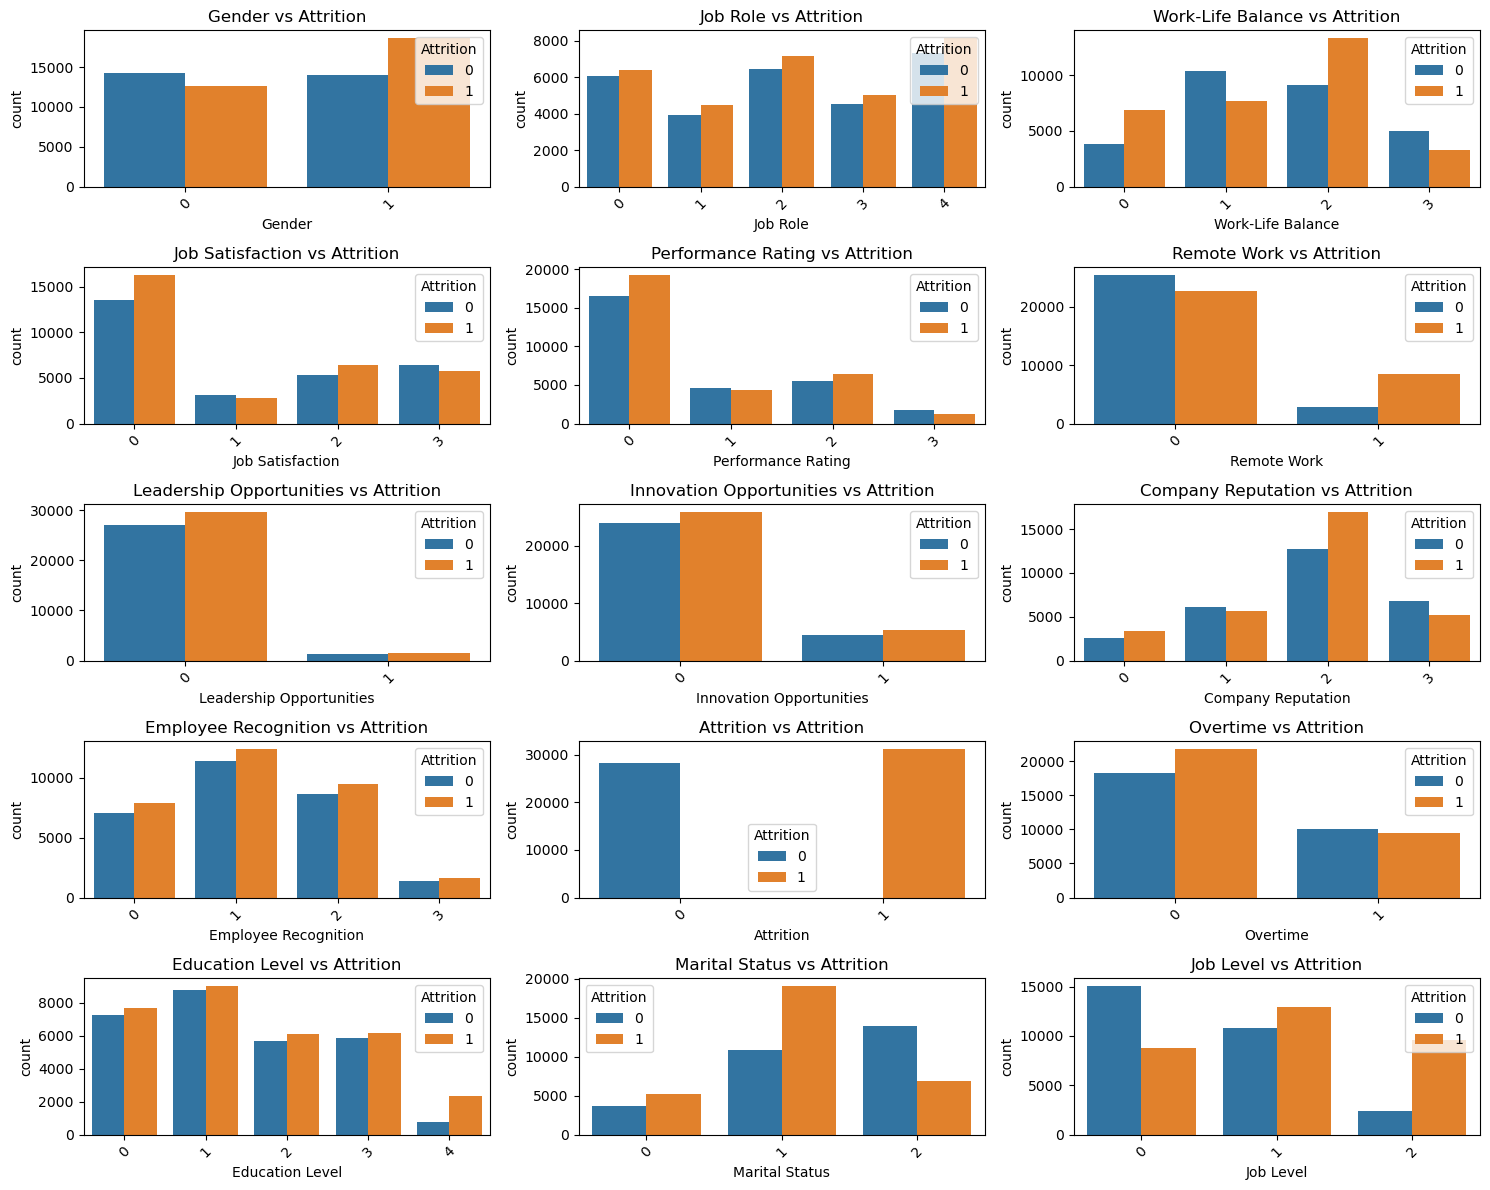

In [14]:
# Plot categorical features vs Attrition
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols[:-1], 1):  
    plt.subplot(5, 3, i)
    sns.countplot(x=col, hue='Attrition', data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Attrition')
plt.tight_layout()
plt.show()

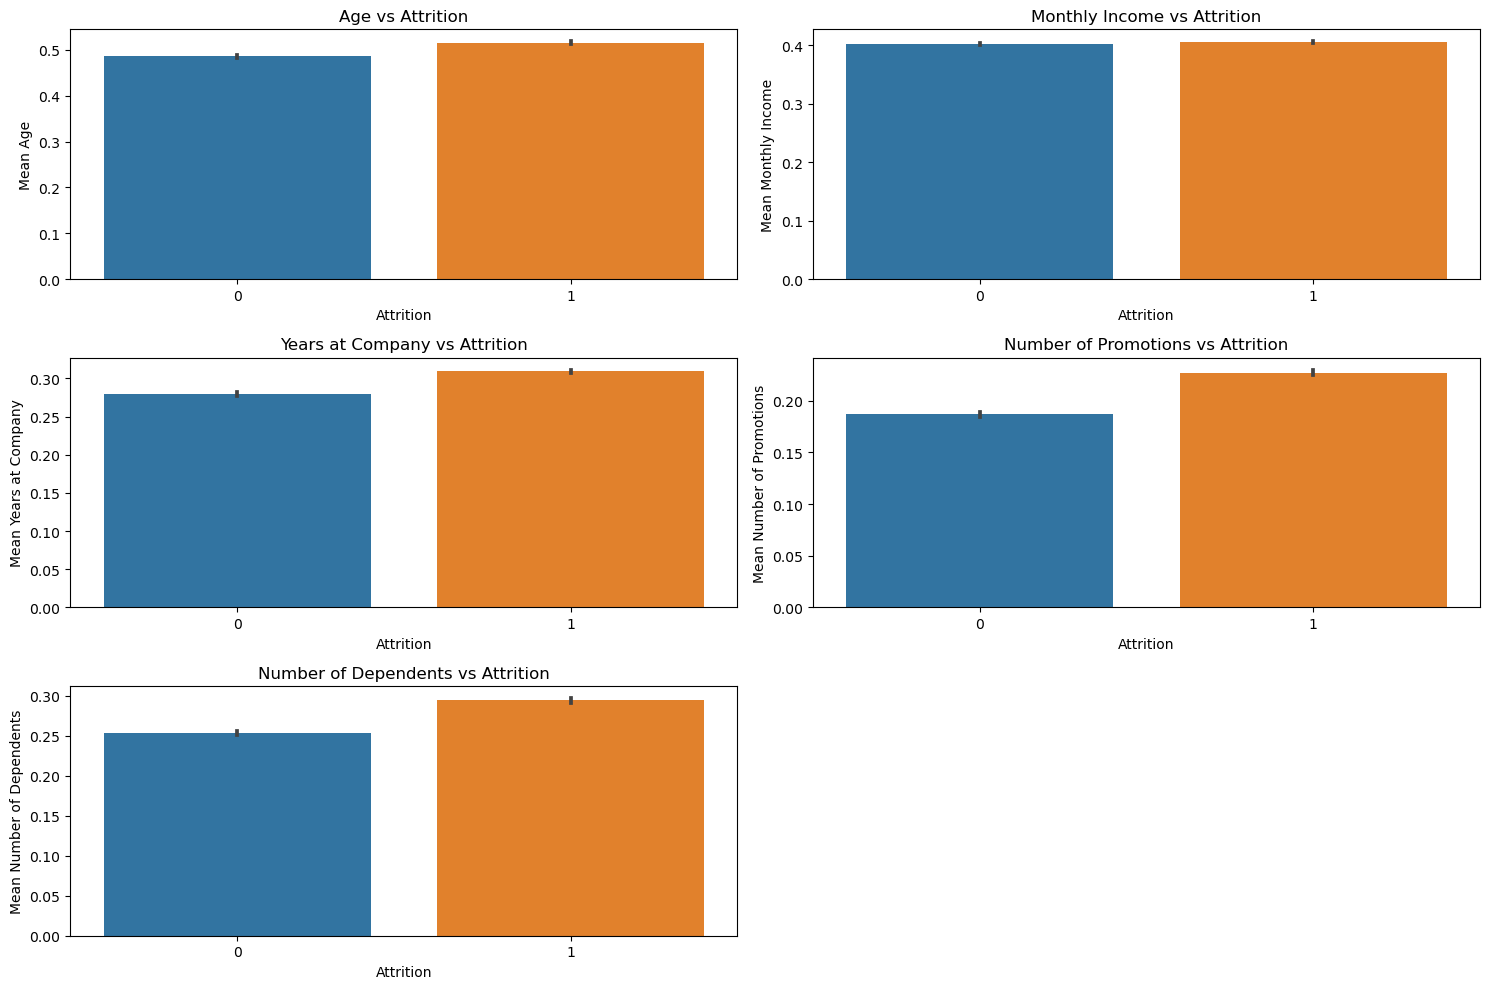

In [15]:
# Bar plots for numerical features vs Attrition
plt.figure(figsize=(15, 10))

# Loop through each numerical column and plot a bar plot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)  # Create a subplot for each feature
    sns.barplot(x='Attrition', y=col, data=data, estimator='mean')  # Bar plot to show the mean values
    plt.title(f'{col} vs Attrition')  # Set the title for each plot
    plt.xlabel('Attrition')
    plt.ylabel(f'Mean {col}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


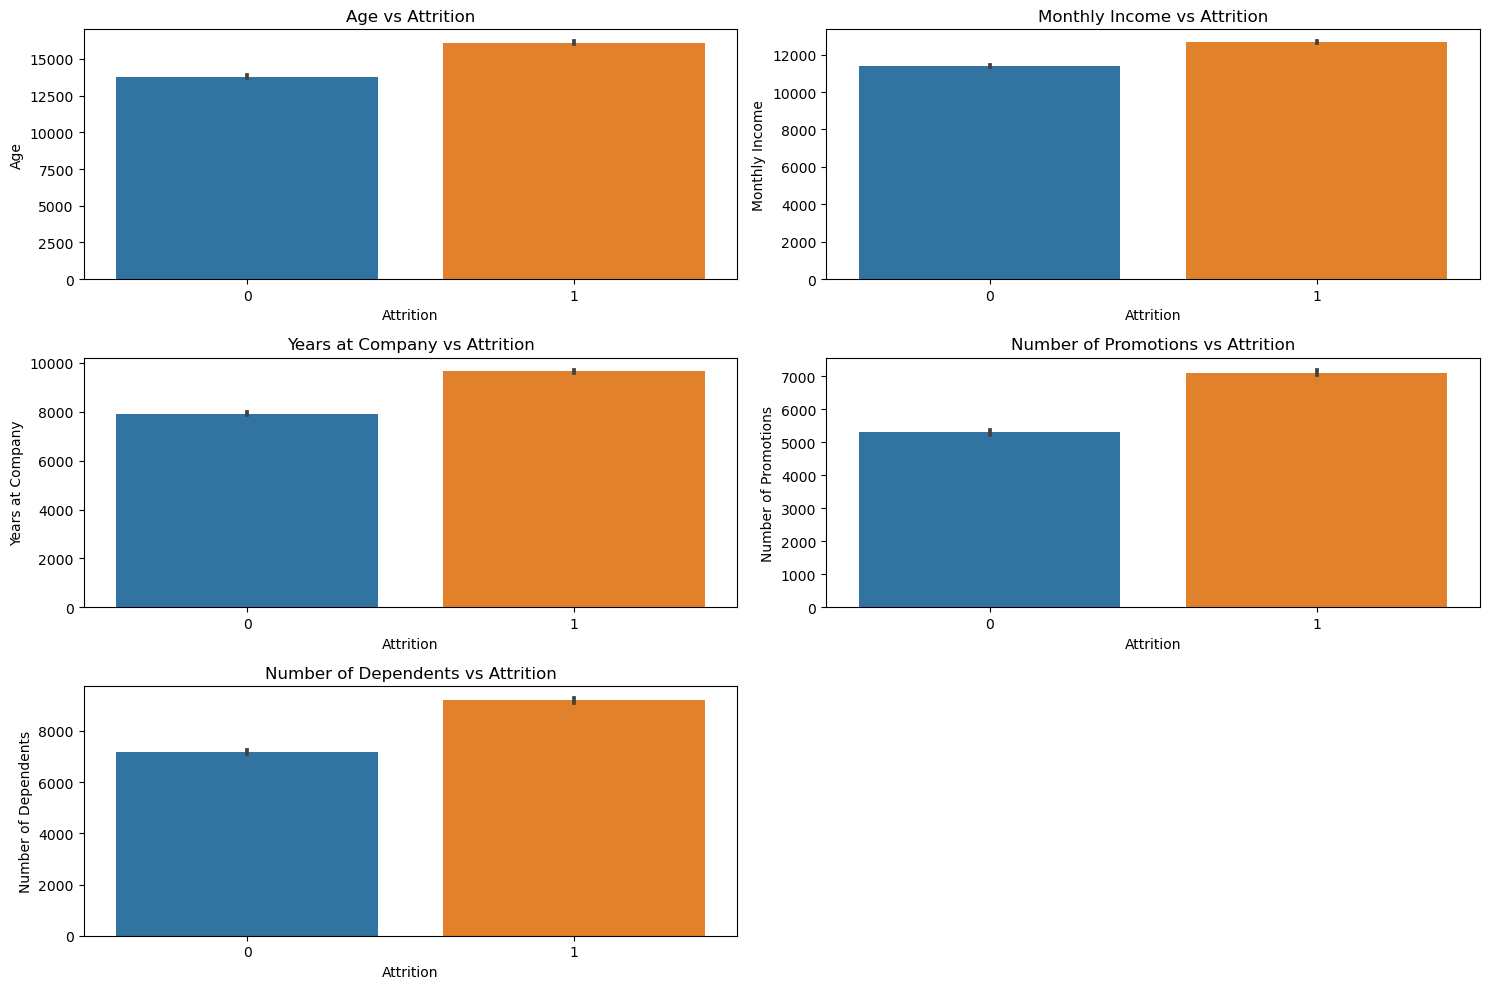

In [16]:
# Plot numerical features vs Attrition
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Attrition', y=col, data=data, estimator=sum)  # Change the plot type to barplot
    plt.title(f'{col} vs Attrition')
plt.tight_layout()
plt.show()


# Correlation Analysis

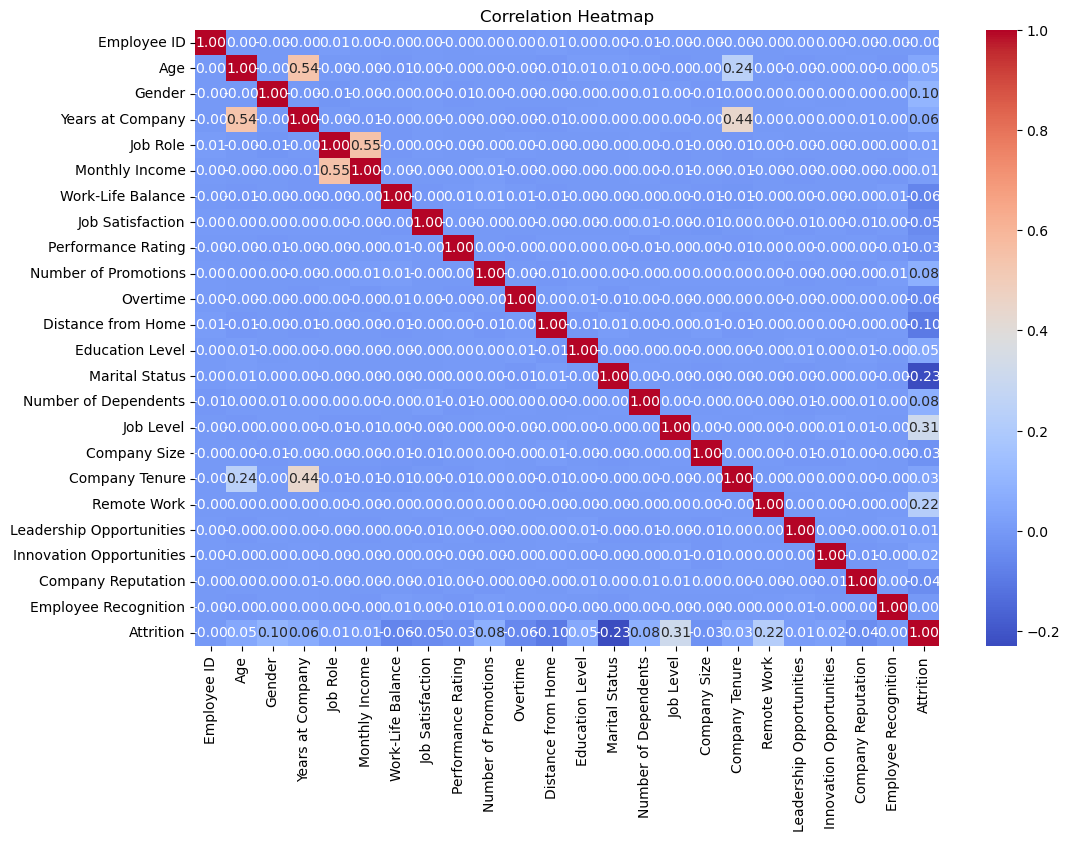

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()